#Predicting Heart Disease Using machine Learning

Approach:
1.Problem_definition
2.Data
3.Evaluation
4.Features
5.Modelling
6.Experimentation

##Problem_Definition

In [1]:
#import the tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [8]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)     #male-1,female-0

sex,0,1
target,,
0,24,114
1,72,93


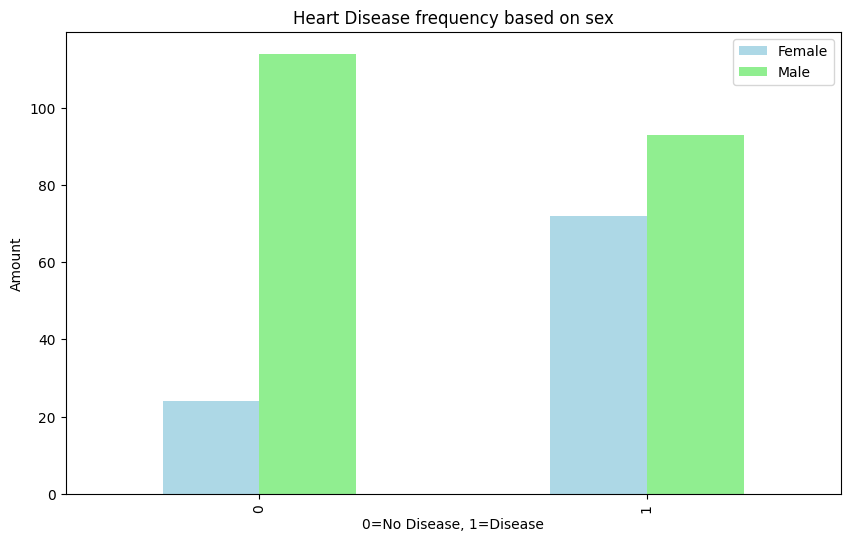

In [9]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["LightBlue","LightGreen"])
plt.title("Heart Disease frequency based on sex")
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);

##Age vs Max Heart Rate for Heart Disease

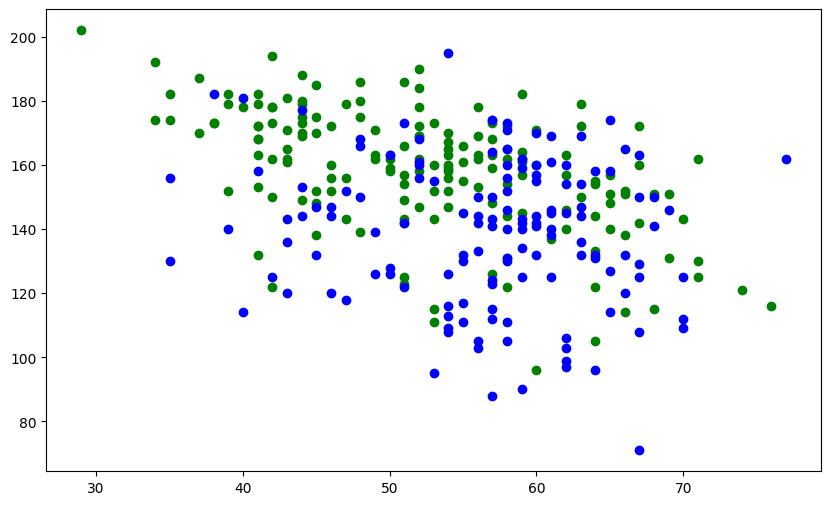

In [10]:
plt.figure(figsize=(10,6))
#scatter with positive
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="Green")

#scatter with negative
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="blue")



Heart Disease Frequency per chest pain type
 cp-chest pain type
 > 0:Typical angina:chest pain related decrease blood supply to the heart
 > 1:Atypical angina:chest pain not related to heart
 > 2:Non-anginal pain:typically esophageal spasms(non heart related)
 > 3:Asymptomatic:chest pain showing signs of disease

In [11]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


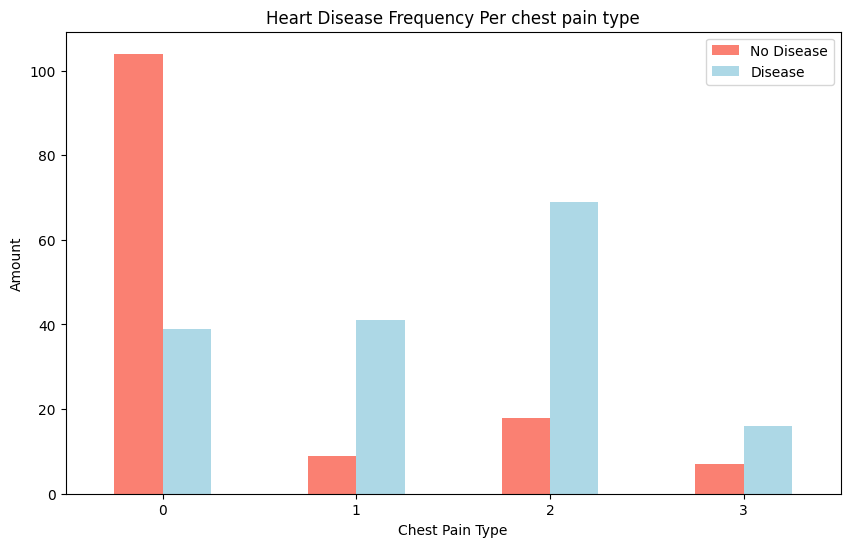

In [12]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart Disease Frequency Per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

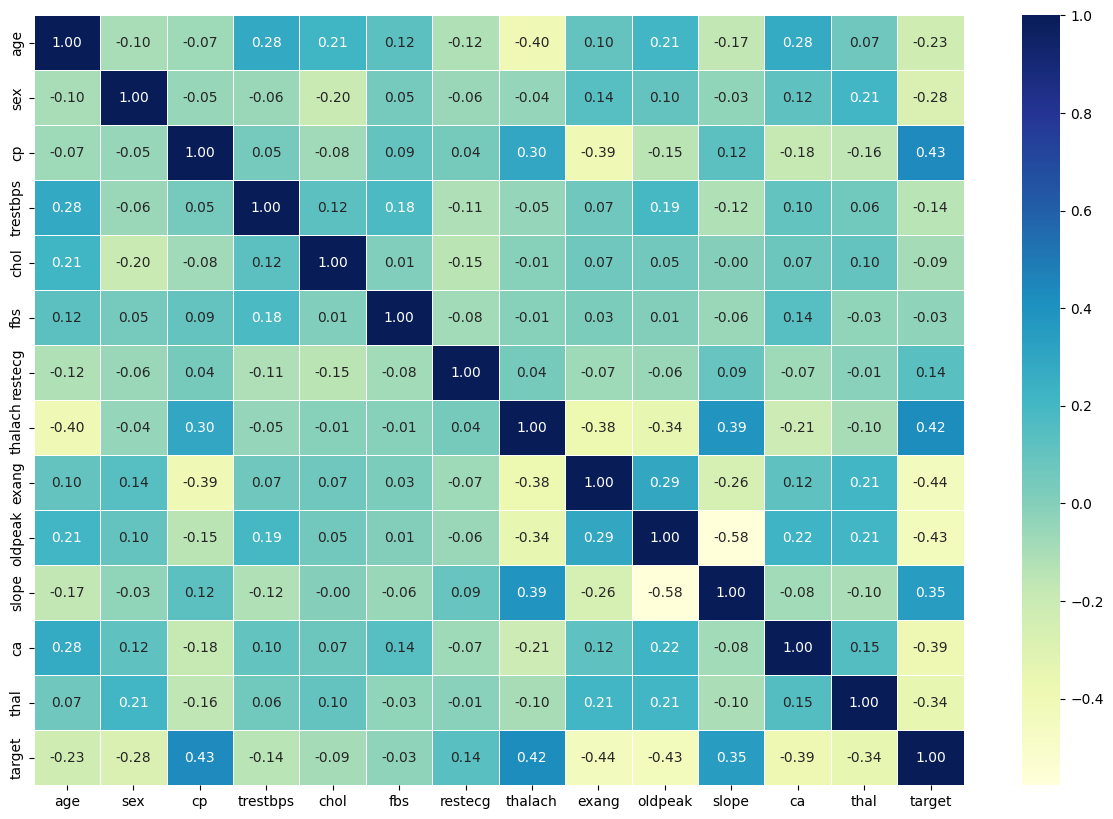

In [13]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

Modelling

In [14]:
X=df.drop("target",axis=1)
Y=df["target"]

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2


In [17]:
Y_train

175    0
280    0
297    0
141    1
22     1
      ..
105    1
10     1
52     1
59     1
171    0
Name: target, Length: 242, dtype: int64

#Building a machine learning model

we'll train it on the training set.

Testing will be done on the test set
we are going to try 3 machine Learning models:
1.Logistic Regression
2.K-Nearest Neighbours Classifier
3.Random Forest Classifier

In [18]:
models={"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores
        

In [19]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test)

model_scores

C:\Users\uppad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9344262295081968,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8688524590163934}

Model Comparison

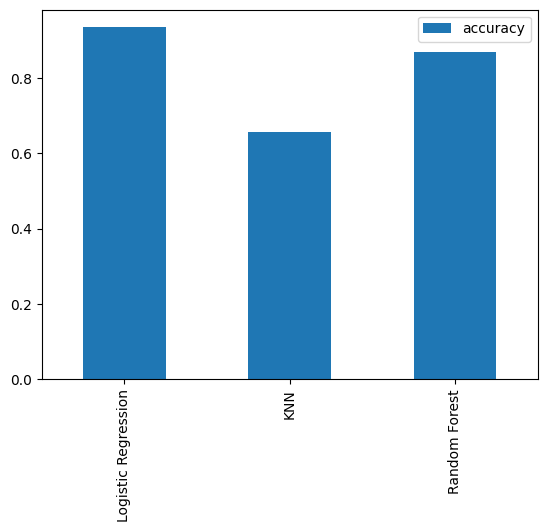

In [20]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

We got base model...models first predictions arent always final.We should go with further steps
>Hyperparameter tuning
>Feature importance
>confusion matrix
>cross_validation
>Precision
>Recall
>F1 score
>Classification report
>ROC curve
>Area under the curve (AUC)

Hyper Parameter Tuning

In [21]:
#Tuning KNN
train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbours
neighbors=range(1,21)

#set up KNN instance
knn=KNeighborsClassifier()

#Loop for different n_ neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #fit the algorithm
    knn.fit(X_train,Y_train)

    #update the training scores list
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))


In [22]:
train_scores

[1.0,
 0.8223140495867769,
 0.7933884297520661,
 0.7851239669421488,
 0.7727272727272727,
 0.768595041322314,
 0.7520661157024794,
 0.7396694214876033,
 0.7107438016528925,
 0.7066115702479339,
 0.6818181818181818,
 0.6900826446280992,
 0.6983471074380165,
 0.6983471074380165,
 0.6942148760330579,
 0.6735537190082644,
 0.6983471074380165,
 0.6859504132231405,
 0.6900826446280992,
 0.6900826446280992]

In [23]:
import numpy as np
test_scores

[0.5573770491803278,
 0.5901639344262295,
 0.6065573770491803,
 0.6885245901639344,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6721311475409836]

Maximum KNN score on the test data:70.49%


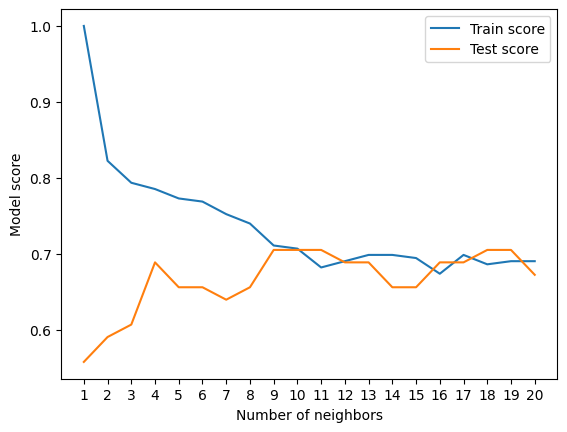

In [24]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

##Hyper parameter tuning using Randomized Search CV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

......using RandomizedSearchCV

In [25]:
#create a hyperparameter grid for LogisticRegression
log_reg_grid={"C" :np.logspace(-4,4,20),"solver" : ["liblinear"] }

#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [26]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

Now we got hyperparameter grids setup for each of our models,lets tune them using 
RandomizedSearchCV

In [27]:
#tuning Logistic Regression
np.random.seed(42)

#setup random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,
                              n_iter=20,
                              verbose=True)
#Fit random hyperparameter search model for LogisticRegression

rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [29]:
rs_log_reg.score(X_test,Y_test)

0.9508196721311475

In [30]:
#random seed
np.random.seed(54)

#Setup  random hyperparameter search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,n_iter=20,verbose=True)

#Fit random hyperparameter searchmodel for RandomForestClassifier()
rs_rf.fit(X_train,Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
#Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(13),
 'max_depth': 5}

In [32]:
#Evaluate RandomForestMOdel
rs_rf.score(X_test,Y_test)

0.8852459016393442

1. By Hand
2. RandomizedSearchCv
3. GridSearchCv

#Hyperparameter Tuning with GridSearchCV

improving the model_scores using gridSearchCV.....

In [33]:
#Different Hyperparameters for LogisticRegression model
log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}

#setup grid hyper parametr search for logisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

#fit grid hyperparameter search model
gs_log_reg.fit(X_train,Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [34]:
gs_log_reg.best_params_

{'C': np.float64(0.1082636733874054), 'solver': 'liblinear'}

In [36]:
#Evaluating the gridsearch LogisticRegressionModel
gs_log_reg.score(X_test,Y_test)

0.9344262295081968

Evaluating our tuned machine learning classifier,beyond accuracy

>ROC curve and AUC curve
>Confusion matrix
>Classification report
>Precision
>Recall
>F1-score

In [46]:
#Make predictions withy tuned model
Y_preds=gs_log_reg.predict(X_test)

In [47]:
Y_preds

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

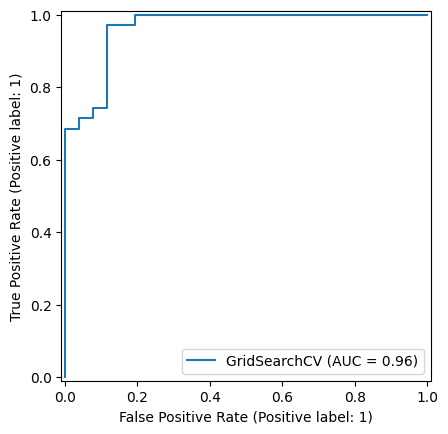

In [48]:
#plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,Y_test)

In [49]:
#Confusion matrix
print(confusion_matrix(Y_test,Y_preds))

[[23  3]
 [ 1 34]]


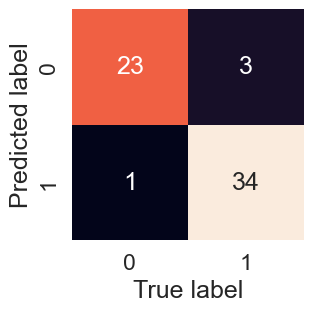

In [52]:
sns.set(font_scale=1.5)
def plot_conf_mat(Y_test,Y_pred):

    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,Y_preds),annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(Y_test,Y_preds)

Classification Report as well as cross-validated precision,recall,F1-score

In [54]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.92      0.97      0.94        35

    accuracy                           0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61



#Evaluation metrics using cross-validation
ie:cross_val_score

In [55]:
#checking best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.1082636733874054), 'solver': 'liblinear'}

In [56]:
clf=LogisticRegression(C=0.1082636733874054,solver='liblinear')

In [60]:
#cross-validated accuracy
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring='accuracy')

cv_acc1=np.mean(cv_acc)
print(cv_acc)
print(cv_acc1)

[0.81967213 0.90163934 0.83606557 0.86666667 0.75      ]
0.834808743169399


In [63]:
#cross-validated precision
cv_precision=cross_val_score(clf,X,Y,cv=5,scoring='precision')
cv_precision= np.mean(cv_precision)
cv_precision


np.float64(0.8182683982683983)

In [64]:
#cross-validated recall
cv_recall=cross_val_score(clf,X,Y,cv=5,scoring='recall')
cv_recall= np.mean(cv_recall)
cv_recall


np.float64(0.9030303030303031)

In [65]:
#cross validated F!-score
cv_f1=cross_val_score(clf,X,Y,cv=5,scoring='f1')
cv_f1= np.mean(cv_recall)
cv_f1

np.float64(0.9030303030303031)

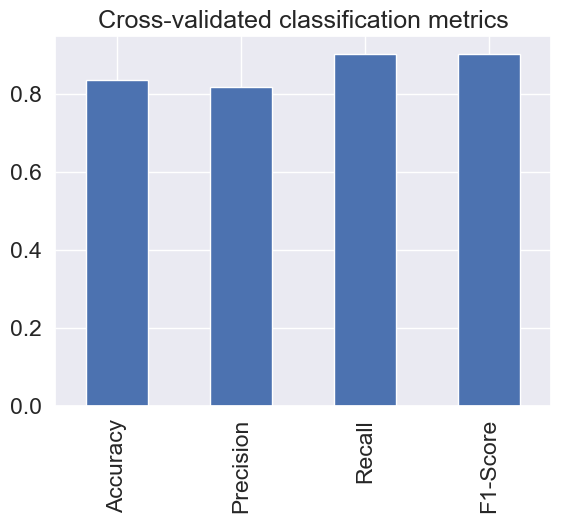

In [70]:
#Visualize cross-validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc1,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1-Score":cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False);

##Feature Importance
Feature  importance is another as asking,"which features contributed most to the outcomes of the model and how did they contribute?"

Finding Feature importance is different for each machine lerning model.One way to find feature importance is to search for "(MODEL NAME) feature importance".

Lets find the feature importance for our LogisticRegression model...

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
#Fit an instance of LogisticRegression
clf=LogisticRegression(C=0.1082636733874054,solver='liblinear')
clf.fit(X_train,Y_train);

In [74]:
#check coefficients
clf.coef_

array([[ 0.00776433, -0.64972954,  0.58476432, -0.01490443, -0.00330493,
         0.06525442,  0.17810803,  0.02558274, -0.36270541, -0.50081369,
         0.21597438, -0.50676012, -0.41759971]])

In [75]:
#Matching coefs of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.007764325316179996),
 'sex': np.float64(-0.6497295356287481),
 'cp': np.float64(0.584764324959225),
 'trestbps': np.float64(-0.014904429563605643),
 'chol': np.float64(-0.003304934425024263),
 'fbs': np.float64(0.06525441950268697),
 'restecg': np.float64(0.17810802965148842),
 'thalach': np.float64(0.025582740280524832),
 'exang': np.float64(-0.36270541345986257),
 'oldpeak': np.float64(-0.5008136856407404),
 'slope': np.float64(0.21597437794995064),
 'ca': np.float64(-0.5067601152955314),
 'thal': np.float64(-0.4175997078210531)}

<Axes: title={'center': 'Feature Importance'}>

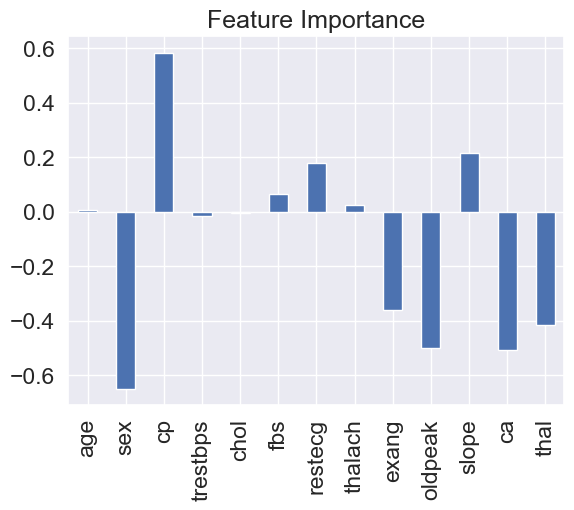

In [78]:
#Visualizing feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

6.Experimentation